In [ ]:
#Import librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Data Processing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Check for Missing Values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#Scale the Amount and Time Features
from sklearn.preprocessing import StandardScaler

df["scaled_amount"] = StandardScaler().fit_transform(df["Amount"].values.reshape(-1,1))
df["scaled_time"] = StandardScaler().fit_transform(df["Time"].values.reshape(-1,1))

df = df.drop(["Amount","Time"], axis=1)


In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [ ]:
#Prepare Feature Matrix
X = df.drop("Class", axis=1)
y = df["Class"]


In [ ]:
#Exploratory Data Analysis (EDA)
#1. Class Distribution
df["Class"].value_counts()


,count
Class,
0,284315
1,492


In [ ]:
#Fraud vs Non-Fraud Transaction Amount
df.groupby("Class")["scaled_amount"].describe()


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,-0.000234,0.999942,-0.353229,-0.330640,-0.265271,-0.045177,102.362243
1,492.0,0.135382,1.026242,-0.353229,-0.349231,-0.316247,0.070128,8.146182


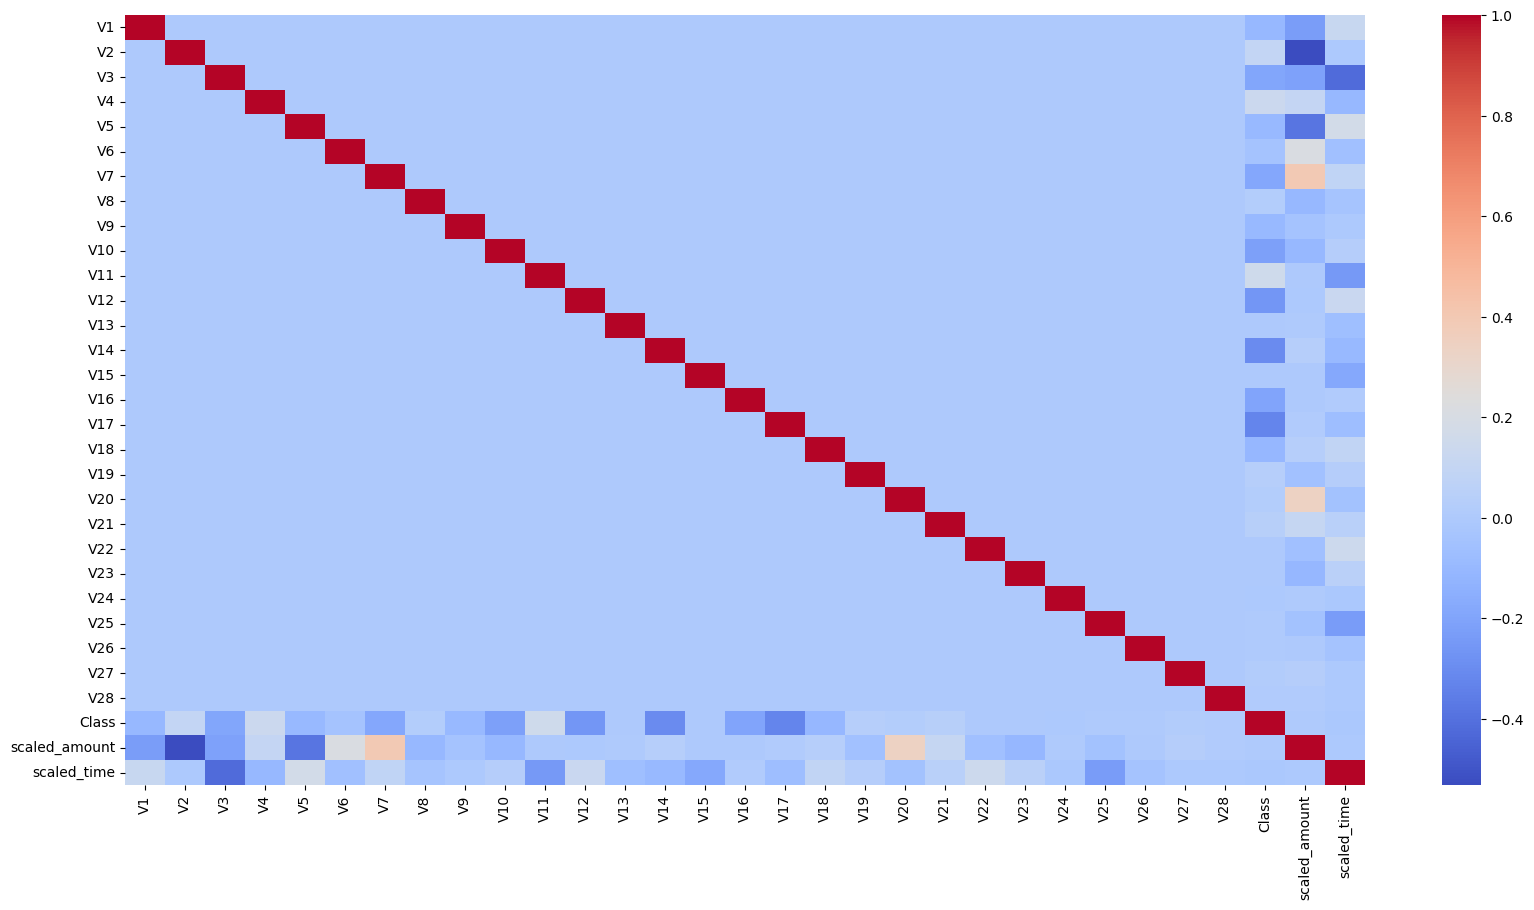

In [ ]:
#Correlation Heatmap
#(PCA features have mixed signs but still help identify strong patterns.)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()


In [ ]:
#Handling Class Imbalance
#Fraud detection datasets require special techniques.
#Option 1 — SMOTE Oversampling
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)


In [ ]:
#Machine Learning Models
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight="balanced", max_iter=1000)
lr.fit(X, y)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = lr.predict(X)
print(classification_report(y, y_pred))
print("AUC:", roc_auc_score(y, lr.predict_proba(X)[:,1]))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.07      0.92      0.13       492

    accuracy                           0.98    284807
   macro avg       0.53      0.95      0.56    284807
weighted avg       1.00      0.98      0.99    284807

AUC: 0.9872604479830211


In [ ]:
#2. Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced"
)
rf.fit(X, y)


RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf.predict(X)
print(classification_report(y, y_pred))
print("AUC:", roc_auc_score(y, rf.predict_proba(X)[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807

AUC: 1.0


In [ ]:
#3. XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight = (len(y[y==0]) / len(y[y==1])),
    max_depth=6,
    learning_rate=0.1,
    n_estimators=300
)
xgb.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = xgb.predict(X)
print(classification_report(y, y_pred))
print("AUC:", roc_auc_score(y, xgb.predict_proba(X)[:,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00       492

    accuracy                           1.00    284807
   macro avg       1.00      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807

AUC: 1.0
